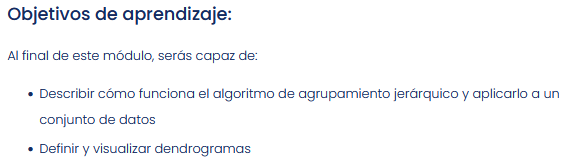

El agrupamiento jerarquico es otra forma de agrupar nuestros datos en diferentes grupos.

Existen dos tipos de algoritmo de agrupamiento jerarquico:

1- Agrupamiento divisivo: Podemos llamar esto como el enfoque "de arriba abajo". Aqui podemos comenzar con todos nuestros datos en un cluster. Desde alli, dividimos los datos en mas y mas clusteres basados en rasgos similares.

2- Agrupamiento aglomerativo: Se peude pensar como el enfoque "ascendente". Comenzamos con cada punto de datos en su propio cluster. Desde alli, agrupamos los clusteres juntos hasta que eventualmente tengamos solo un cluster.

En ambos algoritmos, tenemos que elegir cuantos clusters queremos tener al final. Podemos visualizar lo que podemos pensar que es un numero optimo de clusteres utilizando un diagrama en forma de arbol llamado dendrograma.

In [4]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [6]:
wine = pd.read_csv('/content/drive/MyDrive/Data CodingDojo/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


##**Recuerda que no hay vector objetivo. En este conjunto de datos nos interesa encontrar clusteres**

**Escalar los datos**

In [9]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

**Visualiza el dendrograma**

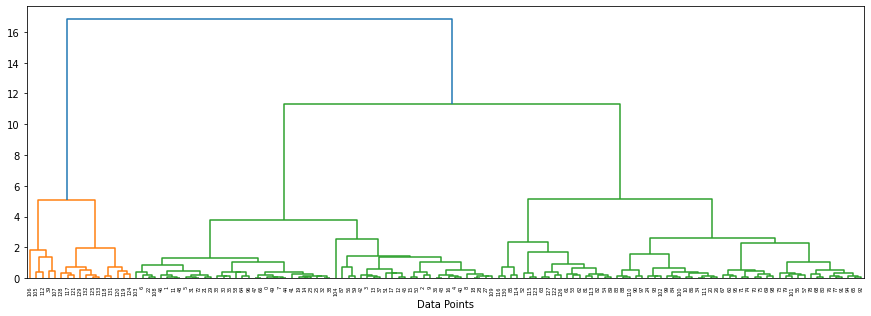

In [10]:
# Visualize Dendogram
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.xlabel('Data Points');

**Escoger clusteres**

Una manera de escoger el numero de clusteres donde un algoritmo de agrupamiento aglomerativo se detiene es examinar este dendrograma.

Podemos utilizar el dendrograma de abajo para determinar el numero optimo de clusteres. Para realizar esto, examinamos el dendrograma para encontrar donde estan las lineas verticales, en general, mas largas y trazamos una linea horizontal en ese lugar. El numero de lineas verticales donde interseca puede ser un buen numero de clusteres. En el dendrograma anterior, parece que las lineas mas largas, en general son entre 6 y 11 en el eje y. Podemos dibujar nuestra linea en 8 y hacer que el algoritmo se detenga en el cluster 3.

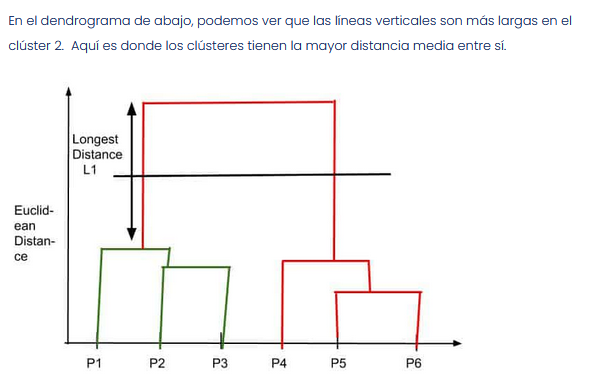

En el siguiente dendrograma podríamos, en cambio, dibujar la línea horizontal donde interseca cuatro largas líneas verticales.  Esto sugiere que deberíamos detener el algoritmo de agrupamiento aglomerativo en los cuatro clústeres.  Algunos clústeres tendrán la distancia media más lejana entre sí.

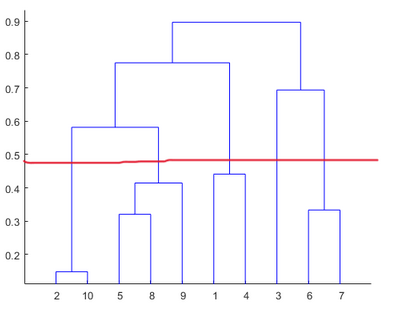

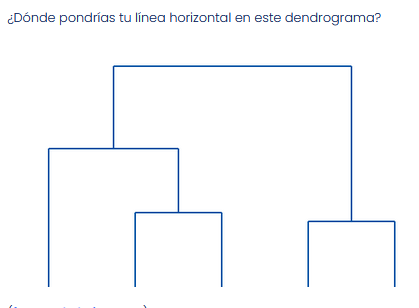

#**Resumen**

Existen dos tipos de agrupamiento jerarquico, el agrupamiento aglomerativo y el agrupamiento divisivo. Una forma de determinar el numero optimo de clusteres es utilizar un dendrograma para encontrar cuantos clusteres produciran la distancia mas grande entre clusteres.

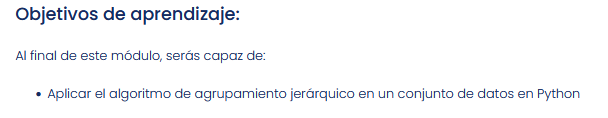

In [11]:
# Instantiate clustering
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)

AgglomerativeClustering()

<ipython-input-12-b0a53c5e92aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = hc.labels_


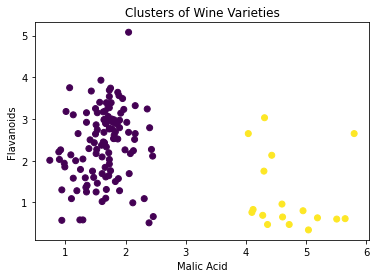

In [12]:
# Save the cluster lables to the dataframe 
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

<ipython-input-13-5f8ea4d461a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = hc.labels_


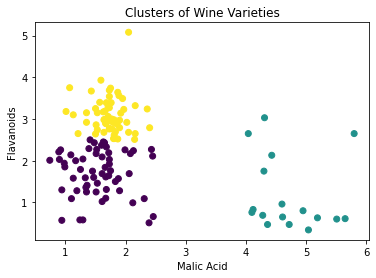

In [13]:
# Try the same thing with 3 clusters
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)
# Save the cluster lables to the dataframe 
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');